# Linear Regression Demo
<br>
A simple linear regression analysis with <b>house price of unit area</b> as the target variable (i.e. Y variable) 
<br>
<br>
Considering:
<ul>
<li> transaction date (unit: date)
<li> house age (unit: year)
<li> distance to the nearest MRT station (unit: meter)
<li> number of convenience stores (within the living circle on foot)
<li> latitude (unit: degree)
<li> longitude (unit: degree)
</ul>
as the explanatory variables (i.e. X variables).
<br>
<br>
<b>Download dataset:</b> http://archive.ics.uci.edu/ml/datasets/Real+estate+valuation+data+set


In [56]:
#imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.lines as lines
%matplotlib inline

import statsmodels.api as sm

In [86]:
#Load the dataset
data = pd.read_csv("Real estate valuation data set .csv",index_col=0)

print("Number of rows: {}".format(len(data)))
data.head(10)

Number of rows: 414


,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
No,,,,,,,
1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1
6,2012.667,7.1,2175.03000,3,24.96305,121.51254,32.1
7,2012.667,34.5,623.47310,7,24.97933,121.53642,40.3
8,2013.417,20.3,287.60250,6,24.98042,121.54228,46.7
9,2013.500,31.7,5512.03800,1,24.95095,121.48458,18.8


In [87]:
#For simplicity we will only consider 2 variables: house age and number of convenience stores
X = data[['X2 house age','X4 number of convenience stores']]
Y = data['Y house price of unit area']

# Data Exploration 

In [88]:
#Description of data
table = X.join(Y).describe().astype('int')
table.to_csv("description.csv")
print(table)

       X2 house age  X4 number of convenience stores  \
count           414                              414   
mean             17                                4   
std              11                                2   
min               0                                0   
25%               9                                1   
50%              16                                4   
75%              28                                6   
max              43                               10   

       Y house price of unit area  
count                         414  
mean                           37  
std                            13  
min                             7  
25%                            27  
50%                            38  
75%                            46  
max                           117  


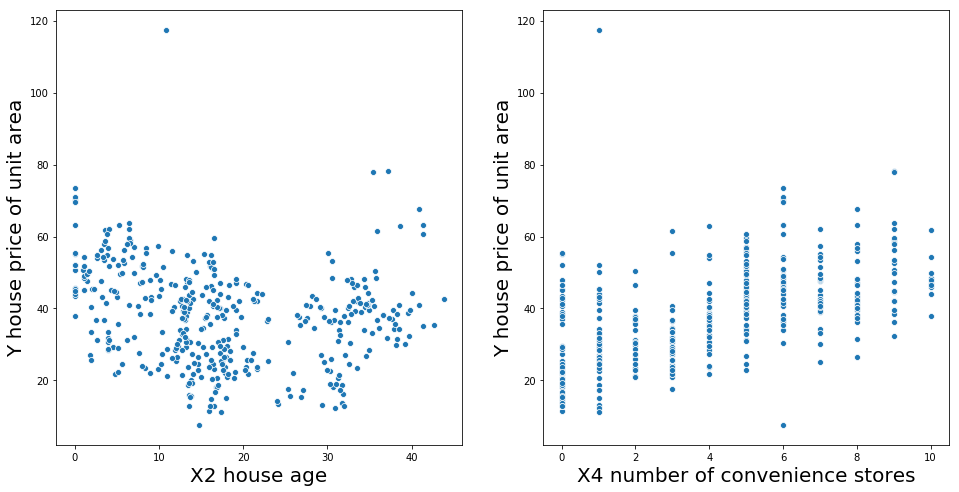

In [37]:
#Relationship with explanatory variables
fig, ax = plt.subplots(nrows=1, ncols=2,figsize=(16,8))


sns.scatterplot(y = Y,x = X['X2 house age'],ax=ax[0] )
sns.scatterplot(y = Y,x = X['X4 number of convenience stores'],ax=ax[1] )

for a in ax: 
    a.xaxis.label.set_fontsize(20)
    a.yaxis.label.set_fontsize(20)



# Linear Regression

### <b>number of convenience stores</b>

In [46]:
X = data[['X4 number of convenience stores']]
X = sm.add_constant(X)
Y = np.log(data['Y house price of unit area'])

results = sm.OLS(Y,X).fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                                
======================================================================================
Dep. Variable:     Y house price of unit area   R-squared:                       0.359
Model:                                    OLS   Adj. R-squared:                  0.357
Method:                         Least Squares   F-statistic:                     230.3
Date:                        Fri, 25 Oct 2019   Prob (F-statistic):           1.22e-41
Time:                                22:49:39   Log-Likelihood:                -107.80
No. Observations:                         414   AIC:                             219.6
Df Residuals:                             412   BIC:                             227.7
Df Model:                                   1                                         
Covariance Type:                    nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                               3.2400      0.027    122.242      0.000       3.188       3.292
X4 number of convenience stores     0.0798      0.005     15.177      0.000       0.069       0.090
==============================================================================
Omnibus:                       31.379   Durbin-Watson:                   1.912
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              108.510
Skew:                          -0.207   Prob(JB):                     2.74e-24
Kurtosis:                       5.474   Cond. No.                         8.87
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

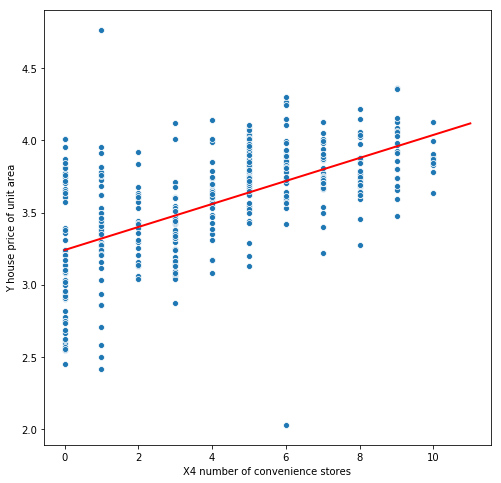

In [66]:
fig, ax = plt.subplots( nrows=1, ncols=1,figsize=(8,8))
sns.scatterplot(y = Y,x = X['X4 number of convenience stores'] )
lines.Line2D([3.24, 10*(0.0798)+3.24], [0, 10], transform=fig.transFigure, figure=fig)
plt.plot([0, 11],[3.24, 11*(0.0798)+3.24], 'r-', lw=2)

### <b>house age</b>

In [69]:
X = data[['X2 house age']]
X = sm.add_constant(X)
Y = np.log(data['Y house price of unit area'])

results = sm.OLS(Y,X).fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                                
======================================================================================
Dep. Variable:     Y house price of unit area   R-squared:                       0.036
Model:                                    OLS   Adj. R-squared:                  0.033
Method:                         Least Squares   F-statistic:                     15.30
Date:                        Fri, 25 Oct 2019   Prob (F-statistic):           0.000107
Time:                                23:01:10   Log-Likelihood:                -192.18
No. Observations:                         414   AIC:                             388.4
Df Residuals:                             412   BIC:                             396.4
Df Model:                                   1                                         
Covariance Type:                    nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            3.6822      0.035    104.949      0.000       3.613       3.751
X2 house age    -0.0065      0.002     -3.912      0.000      -0.010      -0.003
==============================================================================
Omnibus:                       35.059   Durbin-Watson:                   1.895
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               41.877
Skew:                          -0.720   Prob(JB):                     8.06e-10
Kurtosis:                       3.597   Cond. No.                         39.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

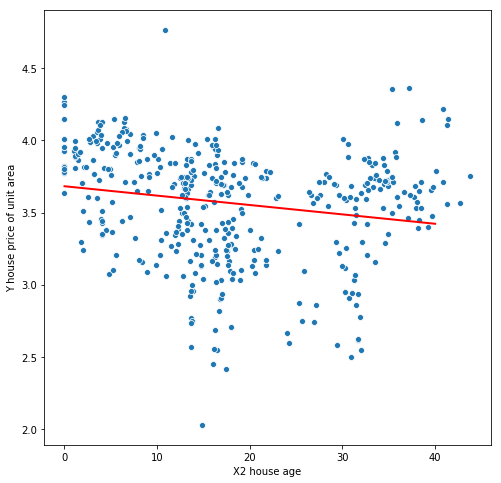

In [72]:
fig, ax = plt.subplots( nrows=1, ncols=1,figsize=(8,8))
sns.scatterplot(y = Y,x = X['X2 house age'] )
plt.plot([0, 40],[3.6822, 40*(-0.0065)+3.6822], 'r-', lw=2)

### <b>house age squared</b>

In [75]:
X = data[['X2 house age']]
X['X2 house age squared'] = X['X2 house age']**2
X = sm.add_constant(X)
Y = np.log(data['Y house price of unit area'])

results = sm.OLS(Y,X).fit()

results.summary()

/Users/conorosully/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                                
======================================================================================
Dep. Variable:     Y house price of unit area   R-squared:                       0.187
Model:                                    OLS   Adj. R-squared:                  0.183
Method:                         Least Squares   F-statistic:                     47.16
Date:                        Fri, 25 Oct 2019   Prob (F-statistic):           3.65e-19
Time:                                23:06:22   Log-Likelihood:                -156.97
No. Observations:                         414   AIC:                             319.9
Df Residuals:                             411   BIC:                             332.0
Df Model:                                   2                                         
Covariance Type:                    nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    3.9934      0.048     83.053      0.000       3.899       4.088
X2 house age            -0.0539      0.006     -9.558      0.000      -0.065      -0.043
X2 house age squared     0.0012      0.000      8.730      0.000       0.001       0.001
==============================================================================
Omnibus:                       26.657   Durbin-Watson:                   1.931
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               30.319
Skew:                          -0.606   Prob(JB):                     2.61e-07
Kurtosis:                       3.535   Cond. No.                     1.79e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.79e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

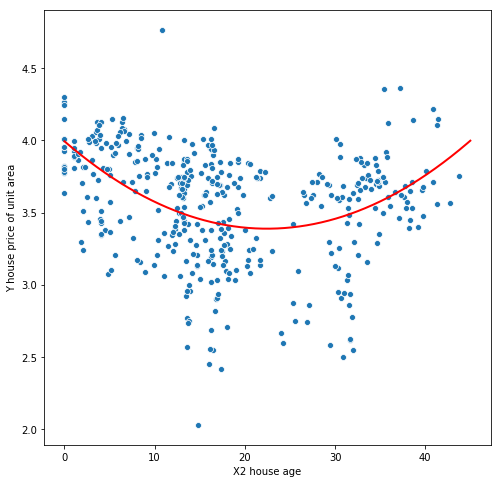

In [79]:
fig, ax = plt.subplots( nrows=1, ncols=1,figsize=(8,8))
sns.scatterplot(y = Y,x = X['X2 house age'] )

x = np.linspace(0, 45, 1000)

# calculate the y value for each element of the x vector
y = 0.0012*x**2 - 0.0539*x + 3.9934 


plt.plot(x,y, 'r-', lw=2)

### Both

In [85]:
X = data[['X2 house age','X4 number of convenience stores']]
X['age squared'] = X['X2 house age']**2
X = sm.add_constant(X)
Y = np.log(data['Y house price of unit area'])
results = sm.OLS(Y,X).fit()

results.summary()

/Users/conorosully/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                                
======================================================================================
Dep. Variable:     Y house price of unit area   R-squared:                       0.467
Model:                                    OLS   Adj. R-squared:                  0.464
Method:                         Least Squares   F-statistic:                     119.9
Date:                        Fri, 25 Oct 2019   Prob (F-statistic):           9.04e-56
Time:                                23:13:10   Log-Likelihood:                -69.320
No. Observations:                         414   AIC:                             146.6
Df Residuals:                             410   BIC:                             162.7
Df Model:                                   3                                         
Covariance Type:                    nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                               3.6040      0.047     76.502      0.000       3.511       3.697
X2 house age                       -0.0385      0.005     -8.207      0.000      -0.048      -0.029
X4 number of convenience stores     0.0729      0.005     14.702      0.000       0.063       0.083
age squared                         0.0008      0.000      6.839      0.000       0.001       0.001
==============================================================================
Omnibus:                       39.279   Durbin-Watson:                   1.944
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              173.728
Skew:                          -0.221   Prob(JB):                     1.89e-38
Kurtosis:                       6.143   Cond. No.                     2.17e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.17e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""